## AS - TP1 - Prise en main de Torch et régression linéaire

#### Batch Descent Gradient 

In [9]:
 require 'nn'
 require 'gnuplot'

 -- 1: Creation du jeux de données
 local DIMENSION=2 -- dimension d'entrée
 local n_points=1000 -- nombre de points d'apprentissage
  
 -- Tirage de deux gaussiennes
   local mean_positive=torch.Tensor(DIMENSION):fill(1); 
   local var_positive=1.0
   local mean_negative=torch.Tensor(DIMENSION):fill(-1);
   local var_negative=1.0
   local xs=torch.Tensor(n_points,DIMENSION)
   local ys=torch.Tensor(n_points,1)
   for i=1,n_points/2 do
        xs[i]:copy(torch.randn(DIMENSION)*var_positive+mean_positive); 
        ys[i][1]=1 
   end

   for i=n_points/2+1,n_points do 
       xs[i]:copy(torch.randn(DIMENSION)*var_negative+mean_negative); 
       ys[i][1]=-1 
   end


 -- 2 : creation du modele
local model=nn.Linear(DIMENSION,1)
local criterion=nn.MSECriterion()
model:reset(0,1)
 
 
 
 -- 3 : Boucle d'apprentissage
 local learning_rate=1e-3
 local maxEpoch=150
 local all_losses={}
 for iteration=1,maxEpoch do
  ------ Mise à jour des paramètres du modèle
    model:zeroGradParameters()
    output=model:forward(xs)
    local loss=0
    loss=criterion:forward(output,ys)
    --print(loss)
    ---- calcul de la loss moyenne 
    all_losses[iteration]=loss  --stockage de la loss moyenne (pour dessin)
  
  
  -- version gradient batch
    delta=criterion:backward(output,ys)
    model:backward(xs,delta)
    model:updateParameters(learning_rate)

  
  -- plot de la frontiere ou plot du loss (utiliser l'un ou l'autre)
  --plot(xs,ys,model,100)  -- uniquement si DIMENSION=2
end


Loss descente de gradient batch : 

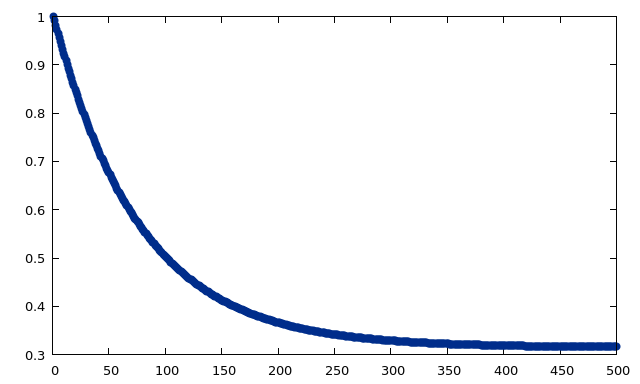

In [10]:
itorch.image('batch_gradient')

Frontière de décision : 

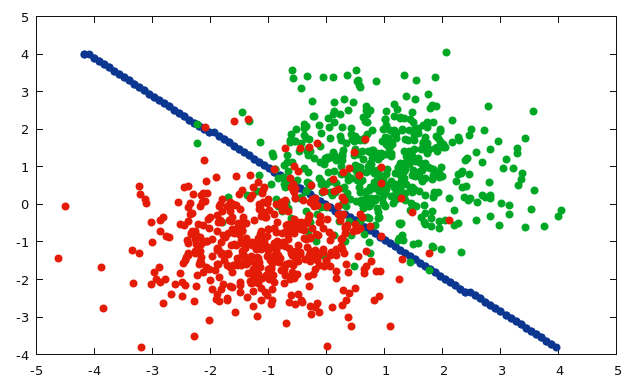

In [11]:
itorch.image('frontiere_batch')

#### Stochastic Gradient Descent 

In [12]:
require 'nn'
require 'gnuplot'
require 'tools'

  -- 1: Creation du jeux de données
 local DIMENSION=2 -- dimension d'entrée
 local n_points=1000 -- nombre de points d'apprentissage

 -- Tirage de deux gaussiennes
   local mean_positive=torch.Tensor(DIMENSION):fill(1);
   local var_positive=1.0
   local mean_negative=torch.Tensor(DIMENSION):fill(-1);
   local var_negative=1.0

   local xs=torch.Tensor(n_points,DIMENSION)
   local ys=torch.Tensor(n_points,1)

   for i=1,n_points/2 do
        xs[i]:copy(torch.randn(DIMENSION)*var_positive+mean_positive);
        ys[i][1]=1
   end

   for i=n_points/2+1,n_points do
        xs[i]:copy(torch.randn(DIMENSION)*var_negative+mean_negative);
        ys[i][1]=-1
    end

 -- 2 : creation du modele
local model=nn.Linear(DIMENSION,1)
local criterion=nn.MSECriterion()
model:reset(0,1)



 -- 3 : Boucle d'apprentissage
 local learning_rate=1e-3
 local maxEpoch=100
 local all_losses={}
 for iteration=1,maxEpoch do
  ------ Mise à jour des paramètres du modèle

    output=model:forward(xs)
    local loss=0
    loss=criterion:forward(output,ys)

    ---- calcul de la loss moyenne
    all_losses[iteration]=loss  --stockage de la loss moyenne (pour dessin)


-- version gradient stochastique
    for i=0,n_points do
         j=math.random(n_points)
         local x=xs[j]
         local y=ys[j]

         model:zeroGradParameters()
         output=model:forward(x)
         delta=criterion:backward(output,y)
         model:backward(x,delta)
         model:updateParameters(learning_rate)
    end

  -- plot de la frontiere ou plot du loss (utiliser l'un ou l'autre)
 --plot(xs,ys,model,100)  -- uniquement si DIMENSION=2
  --gnuplot.plot(torch.Tensor(all_losses))

end

Loss gradient stochastic : 

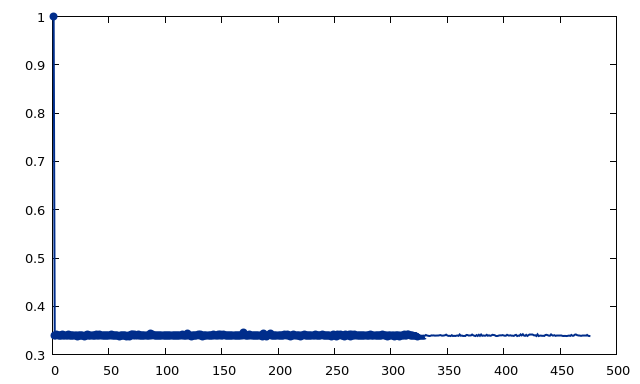

In [13]:
itorch.image('stochastic_version')

Frontière de décision :

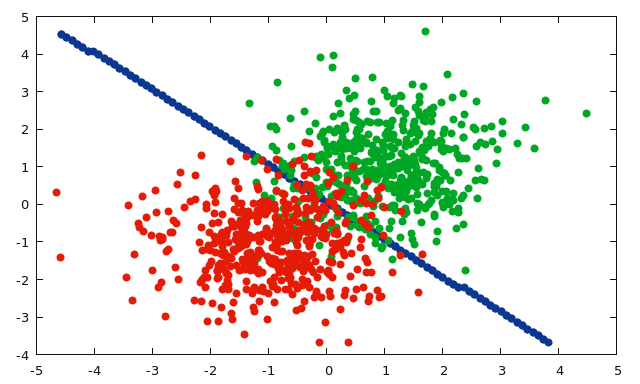

In [14]:
itorch.image('frontiere_stochastic')